<a href="https://colab.research.google.com/github/00000012-x/github_capstoneProject/blob/main/Final_Results(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv')

In [ ]:
df.shape

(1384881, 13)

In [ ]:
df.columns

Index(['ObjectId', 'row_id', 'date_reported', 'health_region', 'age_group',
       'gender', 'exposure', 'case_status', 'latitude', 'longitude',
       'province', 'province_abbr', 'hr_uid'],
      dtype='object')

In [ ]:
df.dtypes

ObjectId           int64
row_id             int64
date_reported     object
health_region     object
age_group         object
gender            object
exposure          object
case_status       object
latitude         float64
longitude        float64
province          object
province_abbr     object
hr_uid           float64
dtype: object

Check Missing Values

In [ ]:
df.isnull().sum()

ObjectId            0
row_id              0
date_reported       0
health_region       0
age_group           0
gender              0
exposure            0
case_status         0
latitude         1168
longitude        1168
province            0
province_abbr       0
hr_uid           1168
dtype: int64

In [ ]:
# Fill missing values with the mean for numerical columns
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

# Fill missing values with the mode for categorical column
df['hr_uid'].fillna(df['hr_uid'].mode().iloc[0], inplace=True)

Compute Descriptive Statistics

In [ ]:
df.describe()

,ObjectId,row_id,latitude,longitude,hr_uid
count,1.384881e+06,1.384881e+06,1.384881e+06,1.384881e+06,1.384881e+06
mean,6.924410e+05,6.924400e+05,4.717074e+01,-8.944138e+01,3.075960e+03
std,3.997809e+05,3.997809e+05,3.724503e+00,1.841134e+01,1.305908e+03
min,1.000000e+00,0.000000e+00,4.215642e+01,-1.350473e+02,4.710000e+02
25%,3.462210e+05,3.462200e+05,4.376161e+01,-1.117750e+02,2.406000e+03
50%,6.924410e+05,6.924400e+05,4.554207e+01,-7.981357e+01,3.551000e+03
75%,1.038661e+06,1.038660e+06,4.989480e+01,-7.495258e+01,3.595000e+03
max,1.384881e+06,1.384880e+06,6.400267e+01,-5.324018e+01,6.201000e+03


Visualize Distribution

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

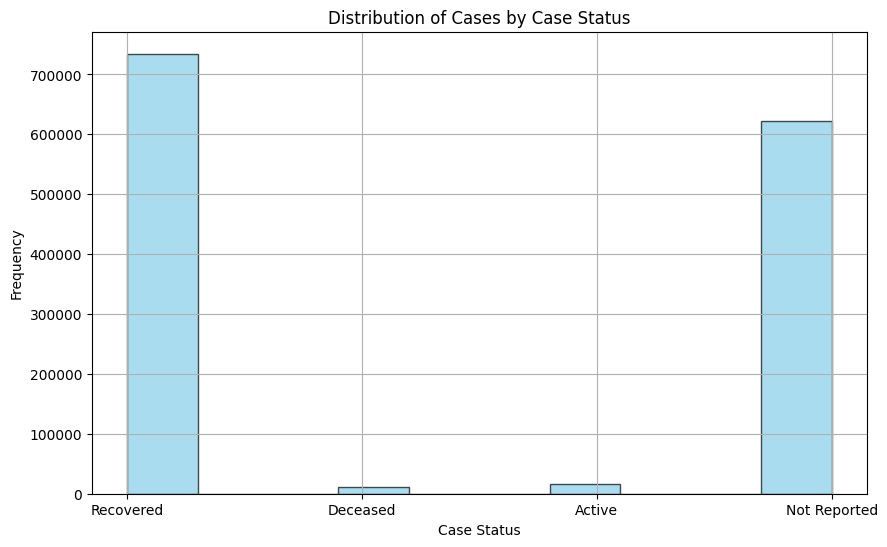

In [ ]:
# Load the dataset into a DataFrame
file_path = '/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv'
covid_data = pd.read_csv(file_path)

# Plot the distribution of cases based on the 'case_status' column
plt.figure(figsize=(10, 6))
plt.hist(covid_data['case_status'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Case Status')
plt.ylabel('Frequency')
plt.title('Distribution of Cases by Case Status')
plt.grid(True)
plt.show()

In [ ]:
# Checking the number of cases in each type

df['case_status'].value_counts()

Recovered       734591
Not Reported    622992
Active           16266
Deceased         11032
Name: case_status, dtype: int64

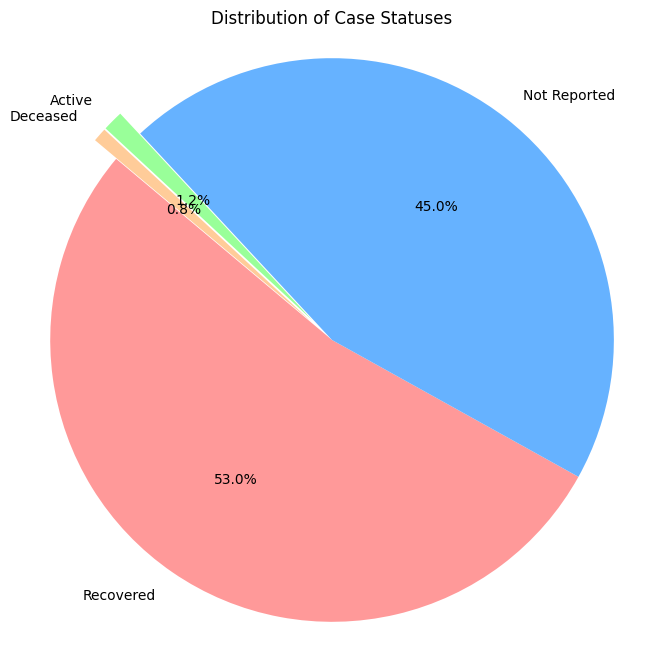

In [ ]:
# Counts of each case status
counts = [734591, 622992, 16266, 11032]


labels = ['Recovered', 'Not Reported', 'Active', 'Deceased']

# Colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']


explode = (0, 0, 0.1, 0.1)

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Case Statuses')
plt.axis('equal')
# Showing the pie chart
plt.show()

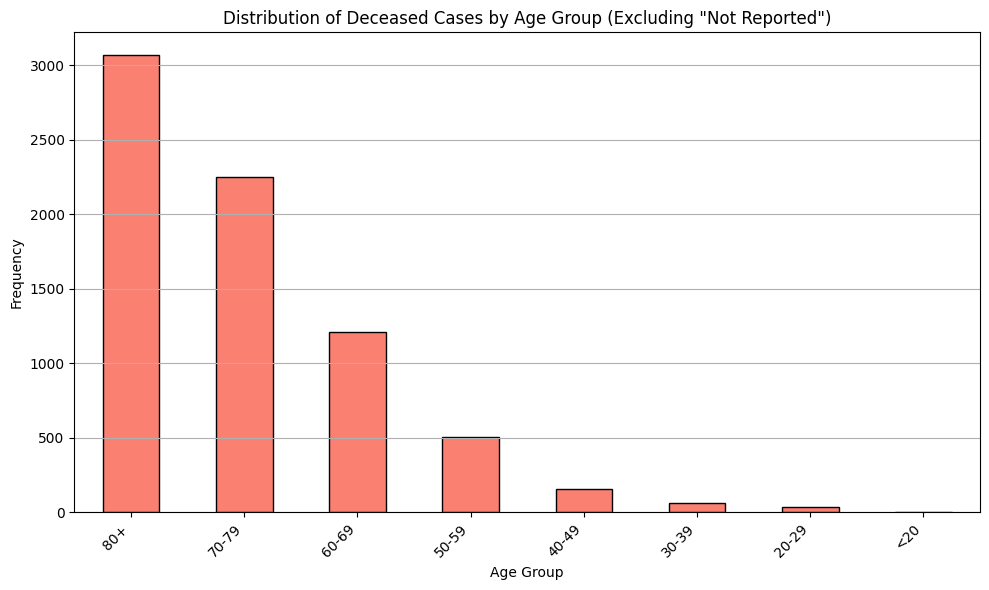

In [ ]:
# Load the dataset into a DataFrame
file_path = '/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv'
covid_data = pd.read_csv(file_path)


deceased_data = covid_data[(covid_data['case_status'] == 'Deceased') & (covid_data['age_group'] != 'Not Reported')]

# Plot the distribution of deceased cases based on the 'age_group' column
plt.figure(figsize=(10, 6))
deceased_data['age_group'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Deceased Cases by Age Group (Excluding "Not Reported")')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = '/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv'
covid_data = pd.read_csv(file_path)

# Filter the DataFrame for deceased cases and exclude 'Not Reported' age group
deceased_data = covid_data[(covid_data['case_status'] == 'Deceased') & (covid_data['age_group'] != 'Not Reported')]

# Calculate the number of deceased cases per age group
deceased_counts = deceased_data['age_group'].value_counts()

# Print the number of deceased cases per age group
print("Number of deceased cases per age group:")
print(deceased_counts)


Number of deceased cases per age group:
80+      3067
70-79    2248
60-69    1210
50-59     503
40-49     157
30-39      60
20-29      33
<20         4
Name: age_group, dtype: int64


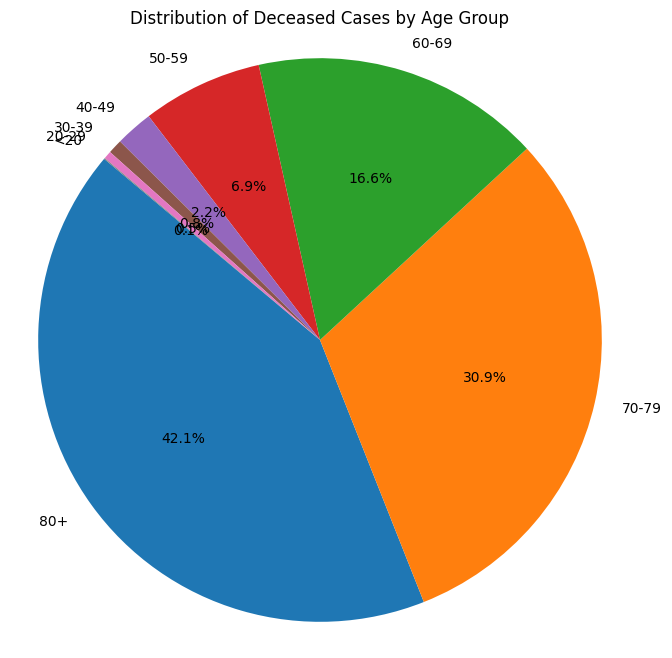

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_path = '/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv'
covid_data = pd.read_csv(file_path)

# Filter the DataFrame for deceased cases and exclude 'Not Reported' age group
deceased_data = covid_data[(covid_data['case_status'] == 'Deceased') & (covid_data['age_group'] != 'Not Reported')]

# Calculate the number of deceased cases per age group
deceased_counts = deceased_data['age_group'].value_counts()

# Create a pie chart to visualize the distribution of deceased cases per age group
plt.figure(figsize=(8, 8))
plt.pie(deceased_counts, labels=deceased_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Deceased Cases by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:

# Calculate the total number of confirmed cases
total_confirmed_cases = len(covid_data)  # Total number of rows in the DataFrame

# For deaths and recoveries, we can use groupby and count based on the 'case_status' column
total_deaths = covid_data[covid_data['case_status'] == 'Deceased'].shape[0]  # Total number of rows with 'Deceased' status
total_recoveries = covid_data[covid_data['case_status'] == 'Recovered'].shape[0]  # Total number of rows with 'Recovered' status

print("Total confirmed cases:", total_confirmed_cases)
print("Total deaths:", total_deaths)
print("Total recoveries:", total_recoveries)


Total confirmed cases: 1384881
Total deaths: 11032
Total recoveries: 734591


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the dataset for classification
X_classification = covid_data[['age_group', 'gender']].copy()  # Features: age group and gender
y_classification = covid_data['case_status']  # Target variable: case status

# Encode categorical variables if necessary (e.g., gender)
label_encoder = LabelEncoder()
X_classification['gender'] = label_encoder.fit_transform(X_classification['gender'])

# Preprocess the 'age_group' column
# Option 1: Label Encoding
X_classification['age_group'] = label_encoder.fit_transform(X_classification['age_group'])

# Option 2: Binning (assuming 'age_group' contains ranges)
# X_classification['age_group'] = X_classification['age_group'].apply(lambda x: int(x.split('-')[0]))

# Split the data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Train a Random Forest Classifier for classification
classifier = RandomForestClassifier()
classifier.fit(X_train_cls, y_train_cls)

# Predict case status on the testing set
y_pred_cls = classifier.predict(X_test_cls)

# Evaluate the classification model
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Classification Accuracy:", classification_accuracy)


Classification Accuracy: 0.8715813948450594


In [ ]:
# Filter the DataFrame for 'Deceased' case status to count deaths
deaths_by_age_gender = covid_data[covid_data['case_status'] == 'Deceased'].groupby(['age_group', 'gender']).size()

# Filter the DataFrame for 'Recovered' and 'Deceased' case status to count cases
cases_by_age_gender = covid_data[covid_data['case_status'].isin(['Recovered', 'Deceased'])].groupby(['age_group', 'gender']).size()


Fix imbalance

In [ ]:
import pandas as pd

# Load your DataFrame (assuming it's already loaded)
# Replace this with your DataFrame loading code
# df = pd.read_csv("your_data.csv")

# Fill missing values in numerical columns with mean
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

# Function to fill missing values in categorical column with balanced sampling
def fill_missing_with_balanced_sampling(column):
    # Check for missing values
    if column.isnull().sum() > 0:
        # Calculate mode
        mode_value = column.mode().iloc[0]

        # Count occurrences of each value in the column
        value_counts = column.value_counts()

        # Find the minimum count of any value
        min_count = value_counts.min()

        # If mode value is missing and there is a class imbalance
        if pd.isnull(mode_value) and len(value_counts) > 1:
            # Replace missing values with balanced sampling
            column.fillna(pd.Series(column.dropna().sample(min_count, replace=True).values), inplace=True)
        else:
            # Fill missing values with mode
            column.fillna(mode_value, inplace=True)

# Fill missing values in categorical columns with balanced sampling
fill_missing_with_balanced_sampling(df['health_region'])
fill_missing_with_balanced_sampling(df['age_group'])
fill_missing_with_balanced_sampling(df['gender'])
fill_missing_with_balanced_sampling(df['exposure'])
fill_missing_with_balanced_sampling(df['case_status'])
fill_missing_with_balanced_sampling(df['province'])
fill_missing_with_balanced_sampling(df['province_abbr'])
fill_missing_with_balanced_sampling(df['hr_uid'])

# Display the DataFrame after filling missing values
print(df.head())



   ObjectId  row_id           date_reported  \
0         1     500  2020/03/23 12:00:00+00   
1         2     501  2020/04/02 12:00:00+00   
2         3     502  2020/03/25 12:00:00+00   
3         4     503  2020/03/28 12:00:00+00   
4         5     504  2020/03/30 12:00:00+00   

                                       health_region age_group  gender  \
0                                 Peel Public Health     20-29  Female   
1                                 Peel Public Health     40-49  Female   
2  Kingston, Frontenac and Lennox & Addington Pub...     30-39    Male   
3  Kingston, Frontenac and Lennox & Addington Pub...       <20  Female   
4                                 Peel Public Health     50-59    Male   

        exposure case_status   latitude  longitude province province_abbr  \
0  Close Contact   Recovered  43.761613 -79.813571  Ontario            ON   
1  Close Contact   Recovered  43.761613 -79.813571  Ontario            ON   
2  Close Contact   Recovered  44.676754 -

Answering My Research Questions

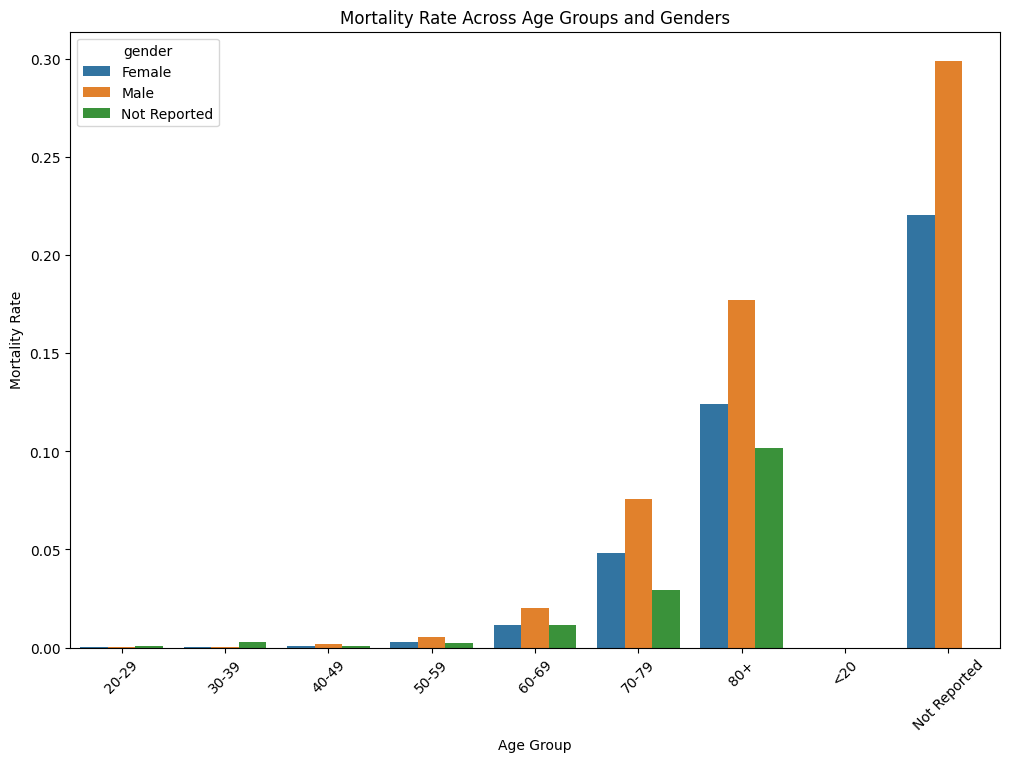

In [ ]:
# Load the dataset
import pandas as pd

covid_data = pd.read_csv('/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv')

# Preprocess the data if necessary (e.g., handle missing values)

# Calculate mortality rate by age group and gender
mortality_rate = covid_data.groupby(['age_group', 'gender'])['case_status'].apply(lambda x: (x == 'Deceased').mean()).reset_index(name='mortality_rate')

# Visualize the mortality rate across different age groups and genders
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(data=mortality_rate, x='age_group', y='mortality_rate', hue='gender')
plt.title('Mortality Rate Across Age Groups and Genders')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate mortality rate by age group and gender
mortality_rate = covid_data.groupby(['age_group', 'gender'])['case_status'].apply(lambda x: (x == 'Deceased').mean()).reset_index(name='mortality_rate')

# Print the mortality rate DataFrame
print("Mortality Rate by Age Group and Gender:")
print(mortality_rate)


Mortality Rate by Age Group and Gender:
       age_group        gender  mortality_rate
0          20-29        Female        0.000159
1          20-29          Male        0.000185
2          20-29  Not Reported        0.000603
3          30-39        Female        0.000235
4          30-39          Male        0.000489
5          30-39  Not Reported        0.002725
6          40-49        Female        0.000762
7          40-49          Male        0.001590
8          40-49  Not Reported        0.001006
9          50-59        Female        0.002890
10         50-59          Male        0.005429
11         50-59  Not Reported        0.002128
12         60-69        Female        0.011747
13         60-69          Male        0.020273
14         60-69  Not Reported        0.011570
15         70-79        Female        0.048225
16         70-79          Male        0.075648
17         70-79  Not Reported        0.029520
18           80+        Female        0.123898
19           80+    

In [ ]:
# Count the occurrences of each exposure type
exposure_counts = covid_data['exposure'].value_counts()

# Identify the exposure type with the highest count
highest_exposure_type = exposure_counts.idxmax()
print("Highest Exposure Type:", highest_exposure_type)


Highest Exposure Type: Not Reported


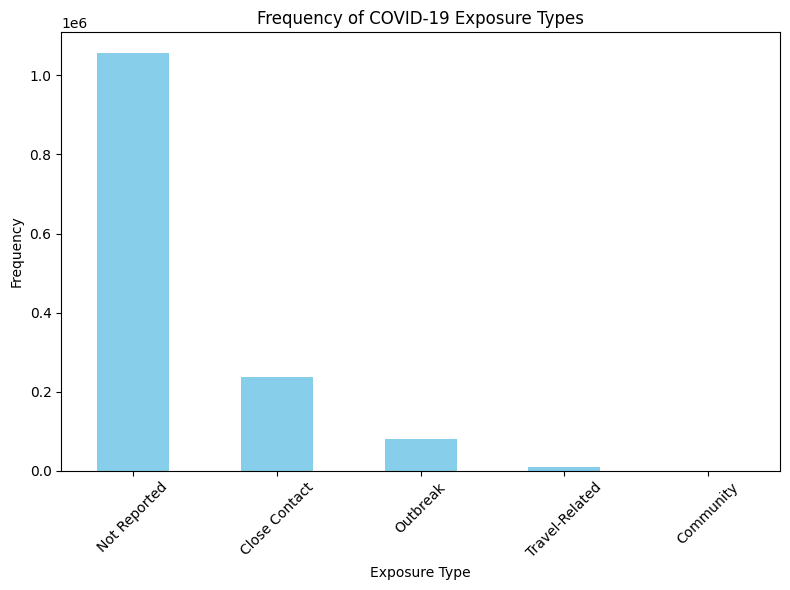

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' containing COVID-19 case data with an 'exposure' column
# df = pd.read_csv('path_to_your_data.csv')

# Count the frequency of each exposure type
exposure_counts = df['exposure'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
exposure_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of COVID-19 Exposure Types')
plt.xlabel('Exposure Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' containing COVID-19 case data with an 'exposure' column
# df = pd.read_csv('path_to_your_data.csv')

# Count the frequency of each exposure type
exposure_counts = df['exposure'].value_counts()

# Print the counts of each exposure type
print("Counts of COVID-19 Exposure Types:")
print(exposure_counts)


Counts of COVID-19 Exposure Types:
Not Reported      1056200
Close Contact      237989
Outbreak            81122
Travel-Related       9548
Community              22
Name: exposure, dtype: int64


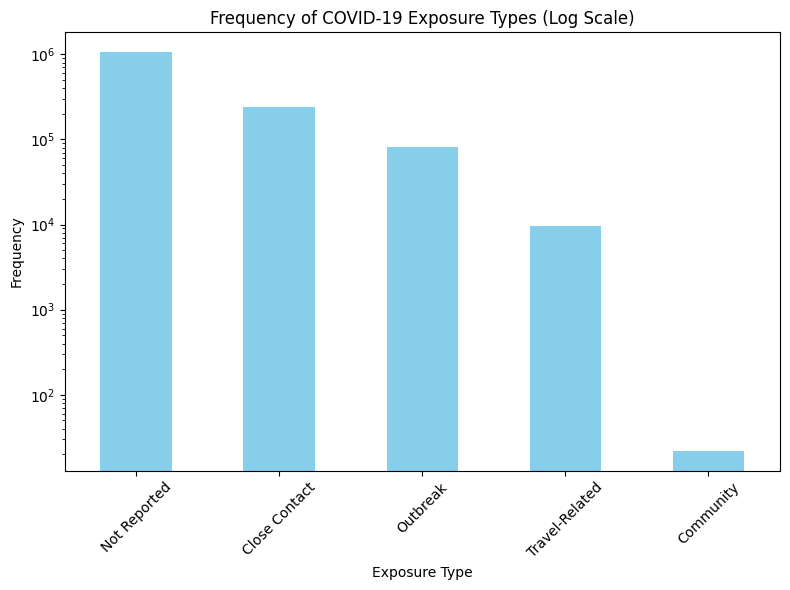

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each exposure type
exposure_counts = df['exposure'].value_counts()

# Plot the bar graph with a logarithmic scale
plt.figure(figsize=(8, 6))
exposure_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of COVID-19 Exposure Types (Log Scale)')
plt.xlabel('Exposure Type')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Are there any spatial clusters or hotspots of COVID-19 cases?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


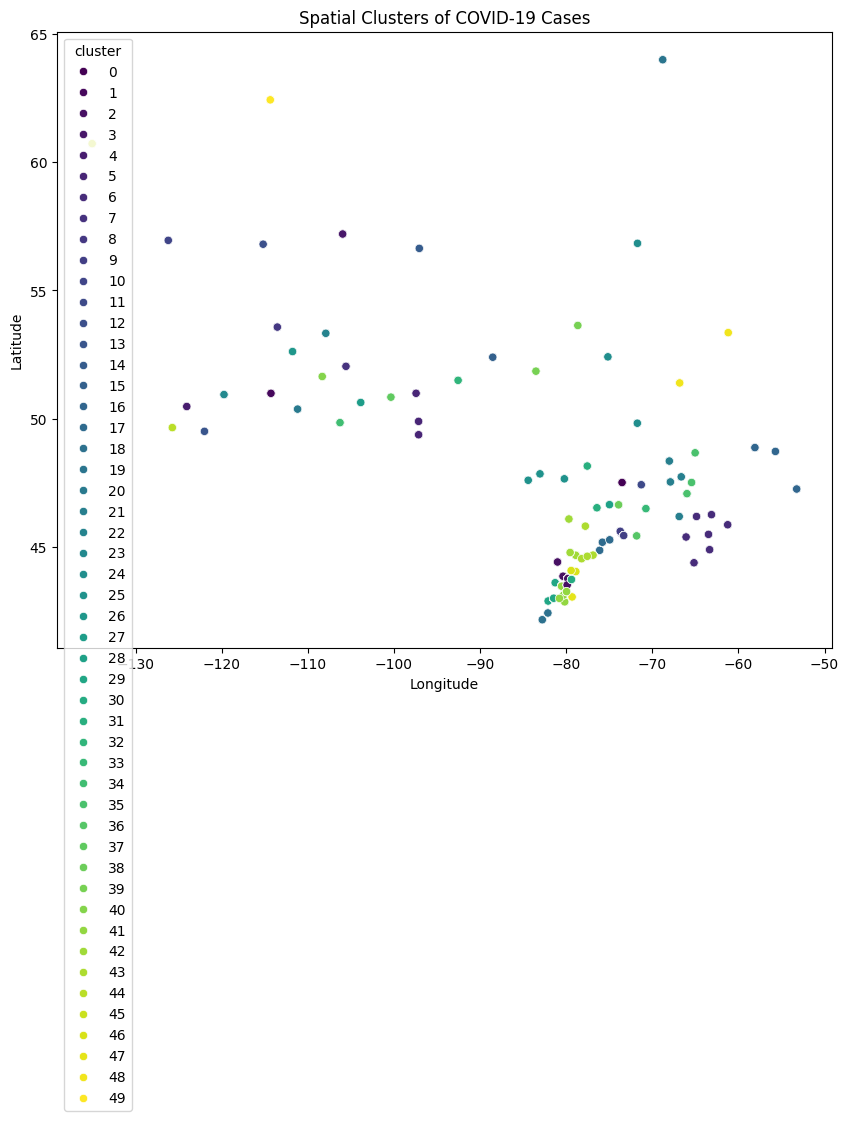

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Extract latitude and longitude columns
X = covid_data[['latitude', 'longitude']]

# Drop rows with missing values, if any
X = X.dropna()

# Define the number of clusters
n_clusters = 50

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
X['cluster'] = kmeans.labels_

# Visualize the clusters or hotspots on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='longitude', y='latitude', hue='cluster', palette='viridis', legend='full')
plt.title('Spatial Clusters of COVID-19 Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [ ]:
# Convert 'date_reported' column to datetime, ignoring errors
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')

# Check for rows with conversion errors
conversion_errors = df[df['date_reported'].isnull()]

# Drop rows with conversion errors
df.drop(conversion_errors.index, inplace=True)


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Generate sample data (replace this with your actual data)
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier on the resampled data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 23   0]
 [  0 177]]


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Generate sample data (replace this with your actual data)
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier on the resampled data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



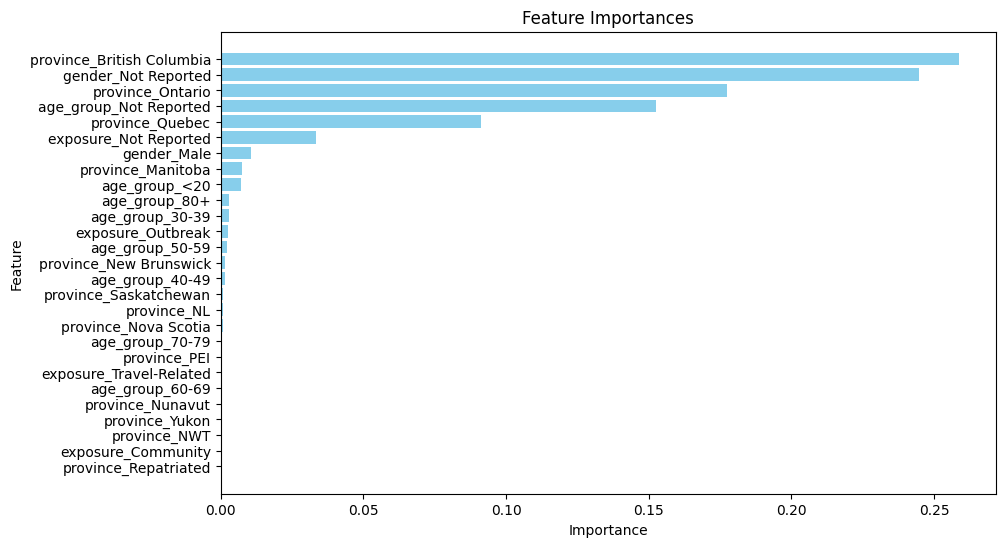

Feature Importances:
                      Feature  Importance
14  province_British Columbia    0.258706
9         gender_Not Reported    0.244781
21           province_Ontario    0.177515
7      age_group_Not Reported    0.152674
23            province_Quebec    0.091055
11      exposure_Not Reported    0.033438
8                 gender_Male    0.010449
15          province_Manitoba    0.007485
6               age_group_<20    0.006919
5               age_group_80+    0.002987
0             age_group_30-39    0.002754
12          exposure_Outbreak    0.002618
2             age_group_50-59    0.002204
18     province_New Brunswick    0.001650
1             age_group_40-49    0.001384
25      province_Saskatchewan    0.000803
16                province_NL    0.000680
19       province_Nova Scotia    0.000673
4             age_group_70-79    0.000578
22               province_PEI    0.000253
13    exposure_Travel-Related    0.000231
3             age_group_60-69    0.000083
20           

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset containing COVID-19 outcomes and relevant features
data = pd.read_csv('/content/sample_data/MyDrive/Dataset/Compiled_COVID-19_Case_Details_(Canada).csv')
# Define features and target variable
features = ['age_group', 'gender', 'exposure', 'province']  # Replace with actual relevant feature names from your dataset
target_variable = 'case_status'  # Assuming 'case_status' represents COVID-19 outcomes

# Check if the target variable column is present in the dataset
if target_variable not in data.columns:
    raise ValueError("Target variable column {} is missing from the dataset.".format(target_variable))

# Drop rows with missing values
data.dropna(subset=features + [target_variable], inplace=True)

# Convert categorical variables to one-hot encoding
data_encoded = pd.get_dummies(data[features], drop_first=True)

# Combine one-hot encoded features with the target variable
data_processed = pd.concat([data_encoded, data[target_variable]], axis=1)

# Split the data into features (X) and target variable (y)
X = data_processed.drop(columns=[target_variable])
y = data_processed[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier with 50 decision trees
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)


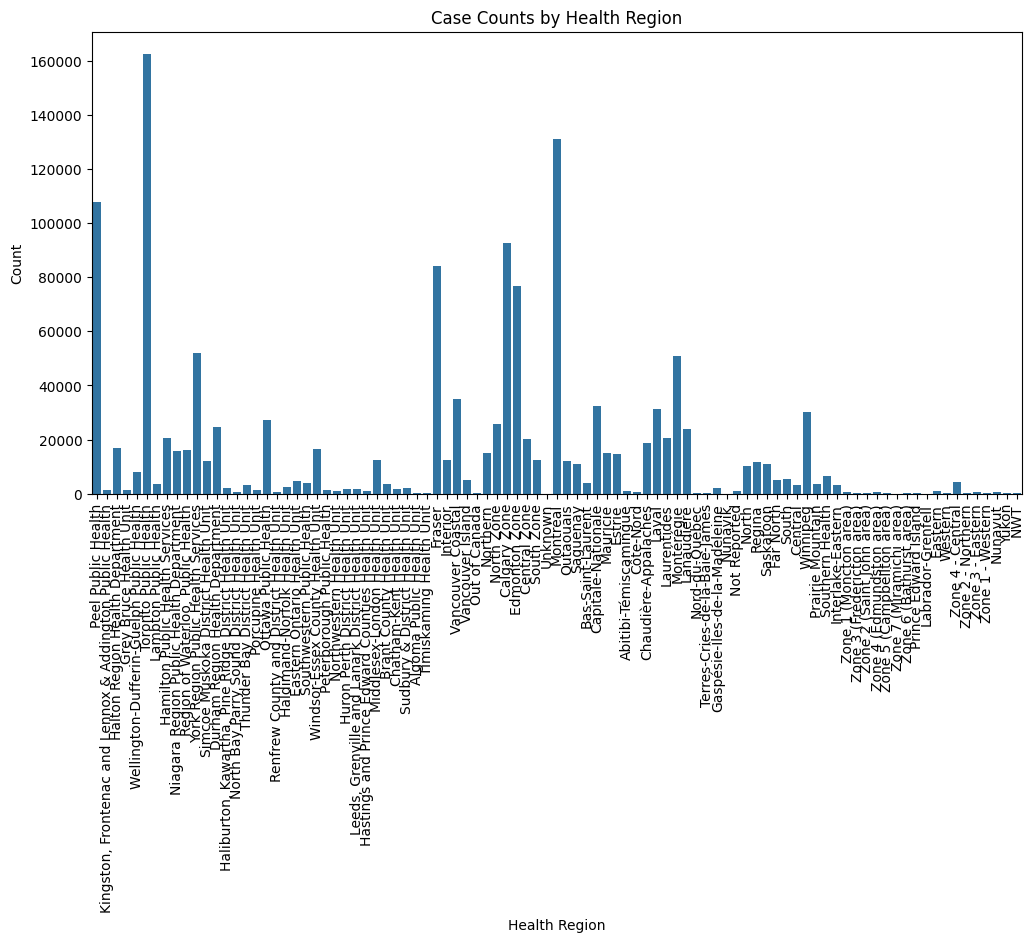

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Plotting case counts by health region
plt.figure(figsize=(12, 6))
sns.countplot(x='health_region', data=df)
plt.title('Case Counts by Health Region')
plt.xlabel('Health Region')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Calculate case counts by health region
case_counts = df['health_region'].value_counts()

# Print case counts for each health region
print("Case Counts by Health Region:")
for region, count in case_counts.items():
    print(f"{region}: {count}")

Case Counts by Health Region:
Toronto Public Health: 162625
Montréal: 131173
Peel Public Health: 107810
Calgary Zone: 92712
Fraser: 84315
Edmonton Zone: 76924
York Region Public Health Services: 52057
Montérégie: 50749
Vancouver Coastal: 34947
Capitale-Nationale: 32578
Laval: 31217
Winnipeg: 30255
Ottawa Public Health: 27163
North Zone: 25828
Durham Region Health Department: 24697
Lanaudière: 23776
Laurentides: 20751
Hamilton Public Health Services: 20671
Central Zone: 20297
Chaudière-Appalaches: 18898
Halton Region Health Department: 17017
Windsor-Essex County Health Unit: 16602
Region of Waterloo, Public Health: 16037
Niagara Region Public Health Department: 15829
Mauricie: 15069
Northern: 15017
Estrie: 14703
Interior: 12454
South Zone: 12352
Middlesex-London Health Unit: 12304
Outaouais: 12201
Simcoe Muskoka District Health Unit: 12100
Regina: 11636
Saskatoon: 11082
Saguenay: 10896
North: 10076
Wellington-Dufferin-Guelph Public Health: 7998
Southern Health: 6562
South: 5463
Vancouve

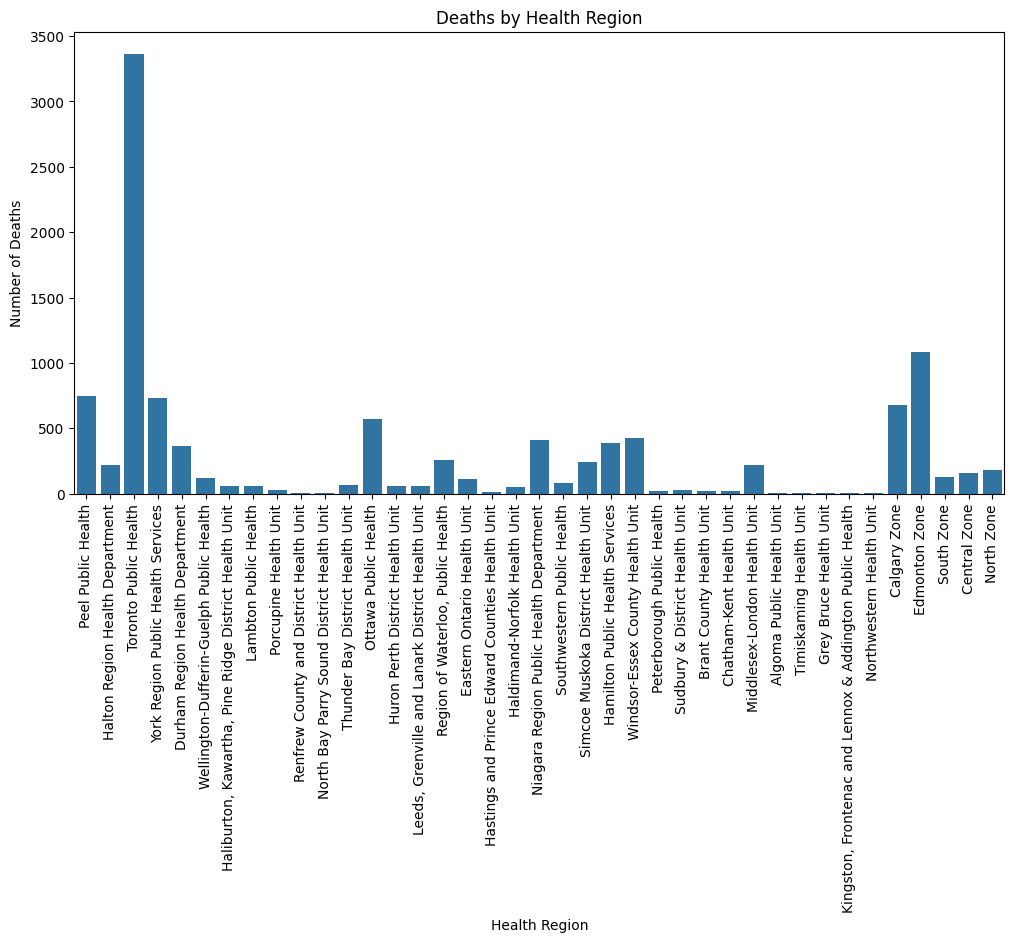

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Filter out only the deceased cases
deceased_cases = df[df['case_status'] == 'Deceased']

# Plotting deaths by health region
plt.figure(figsize=(12, 6))
sns.countplot(x='health_region', data=deceased_cases)
plt.title('Deaths by Health Region')
plt.xlabel('Health Region')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

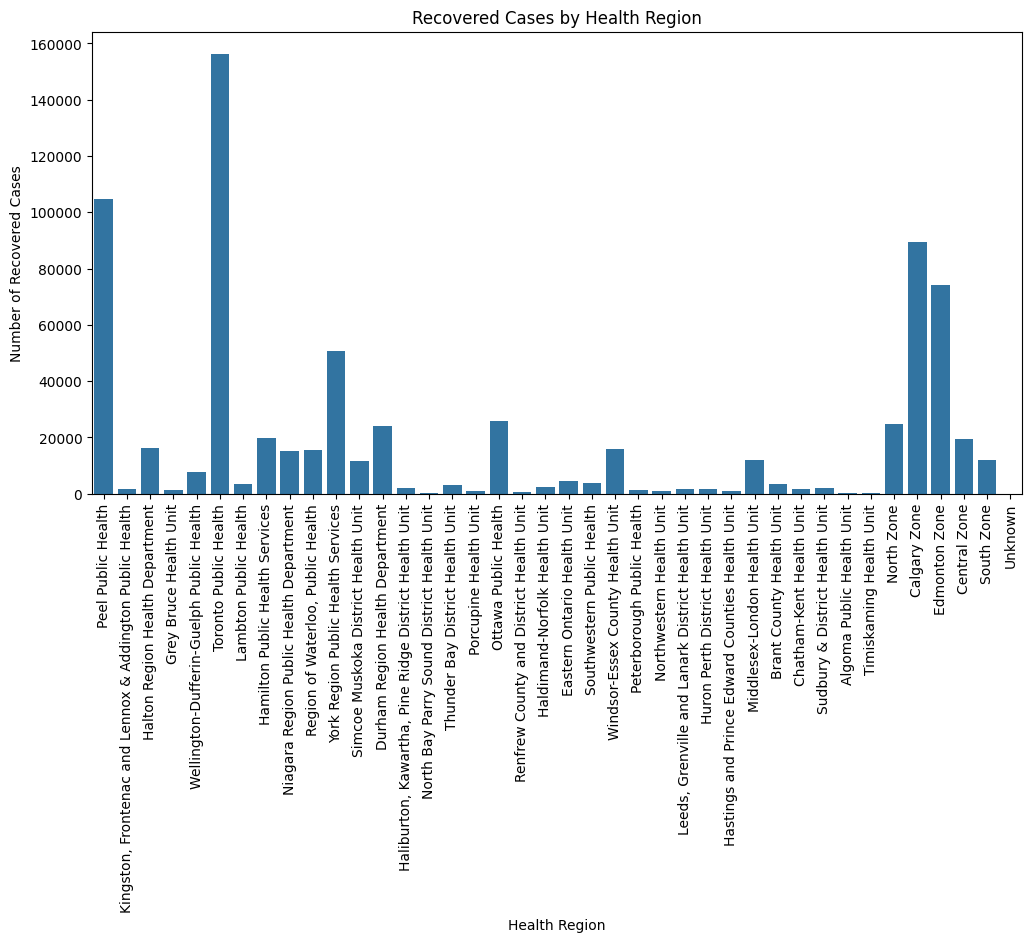

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Filter out only the recovered cases
recovered_cases = df[df['case_status'] == 'Recovered']

# Plotting recovered cases by health region
plt.figure(figsize=(12, 6))
sns.countplot(x='health_region', data=recovered_cases)
plt.title('Recovered Cases by Health Region')
plt.xlabel('Health Region')
plt.ylabel('Number of Recovered Cases')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

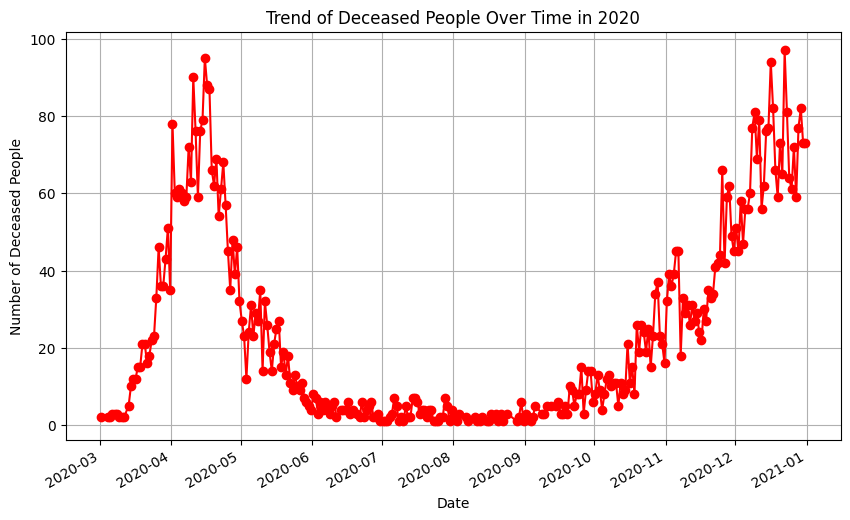

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import necessary libraries

# Step 2: Load the dataset
df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Step 3: Convert 'date_reported' column to datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'])

# Step 4: Filter the dataset to include only records from 2020
df_2020 = df[df['date_reported'].dt.year == 2020]

# Step 5: Filter the dataset to include only deceased cases
deceased_cases = df_2020[df_2020['case_status'] == 'Deceased']

# Step 6: Group by date and count the number of deceased cases on each date
deceased_trend = deceased_cases.groupby('date_reported').size()

# Step 7: Plot the trend of deceased people over time in 2020
plt.figure(figsize=(10, 6))
deceased_trend.plot(kind='line', marker='o', color='red')
plt.title('Trend of Deceased People Over Time in 2020')
plt.xlabel('Date')
plt.ylabel('Number of Deceased People')
plt.grid(True)
plt.show()

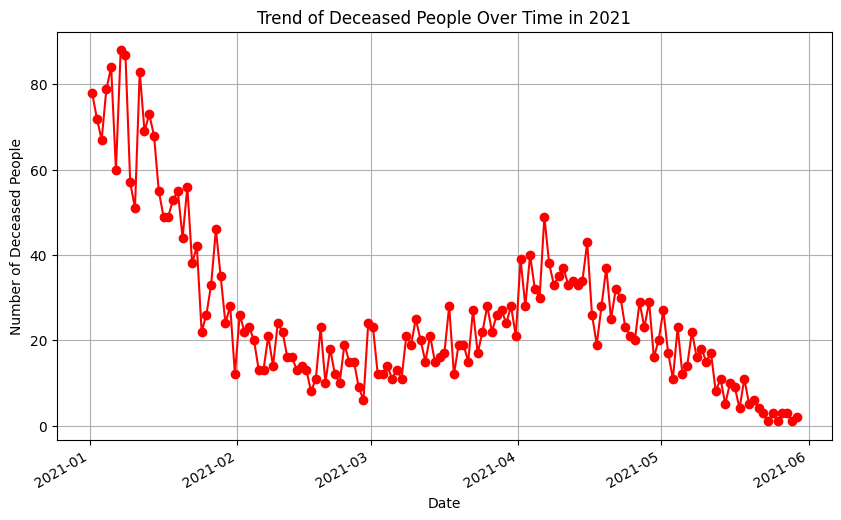

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import necessary libraries

# Step 2: Load the dataset
df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Step 3: Convert 'date_reported' column to datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'])

# Step 4: Filter the dataset to include only records from 2021
df_2021 = df[df['date_reported'].dt.year == 2021]

# Step 5: Filter the dataset to include only deceased cases
deceased_cases = df_2021[df_2021['case_status'] == 'Deceased']

# Step 6: Group by date and count the number of deceased cases on each date
deceased_trend = deceased_cases.groupby('date_reported').size()

# Step 7: Plot the trend of deceased people over time in 2021
plt.figure(figsize=(10, 6))
deceased_trend.plot(kind='line', marker='o', color='red')
plt.title('Trend of Deceased People Over Time in 2021')
plt.xlabel('Date')
plt.ylabel('Number of Deceased People')
plt.grid(True)
plt.show()

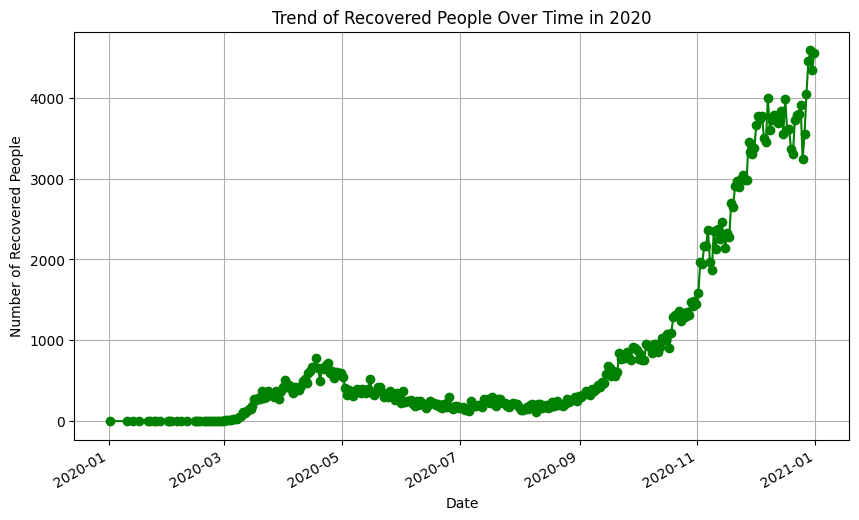

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import necessary libraries

# Step 2: Load the dataset
df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Step 3: Convert 'date_reported' column to datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'])

# Step 4: Filter the dataset to include only records from 2020
df_2020 = df[df['date_reported'].dt.year == 2020]

# Step 5: Filter the dataset to include only recovered cases
recovered_cases = df_2020[df_2020['case_status'] == 'Recovered']

# Step 6: Group by date and count the number of recovered cases on each date
recovered_trend = recovered_cases.groupby('date_reported').size()

# Step 7: Plot the trend of recovered people over time in 2020
plt.figure(figsize=(10, 6))
recovered_trend.plot(kind='line', marker='o', color='green')
plt.title('Trend of Recovered People Over Time in 2020')
plt.xlabel('Date')
plt.ylabel('Number of Recovered People')
plt.grid(True)
plt.show()

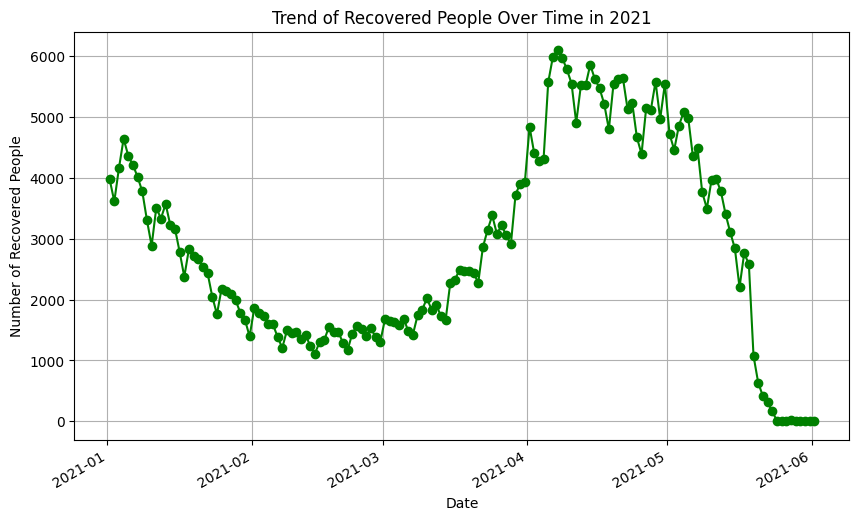

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import necessary libraries

# Step 2: Load the dataset
df = pd.read_csv('/content/sample_data/MyDrive /Dataset /Compiled_COVID-19_Case_Details_(Canada).csv')

# Step 3: Convert 'date_reported' column to datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'])

# Step 4: Filter the dataset to include only records from 2021
df_2021 = df[df['date_reported'].dt.year == 2021]

# Step 5: Filter the dataset to include only recovered cases
recovered_cases = df_2021[df_2021['case_status'] == 'Recovered']

# Step 6: Group by date and count the number of recovered cases on each date
recovered_trend = recovered_cases.groupby('date_reported').size()

# Step 7: Plot the trend of recovered people over time in 2021
plt.figure(figsize=(10, 6))
recovered_trend.plot(kind='line', marker='o', color='green')
plt.title('Trend of Recovered People Over Time in 2021')
plt.xlabel('Date')
plt.ylabel('Number of Recovered People')
plt.grid(True)
plt.show()